<a href="https://colab.research.google.com/github/rafiddeshmukh/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - **Unsupervised**
##### **Contribution**    - **Rafid Deshmukh (Individual)**

# **Project Summary -**

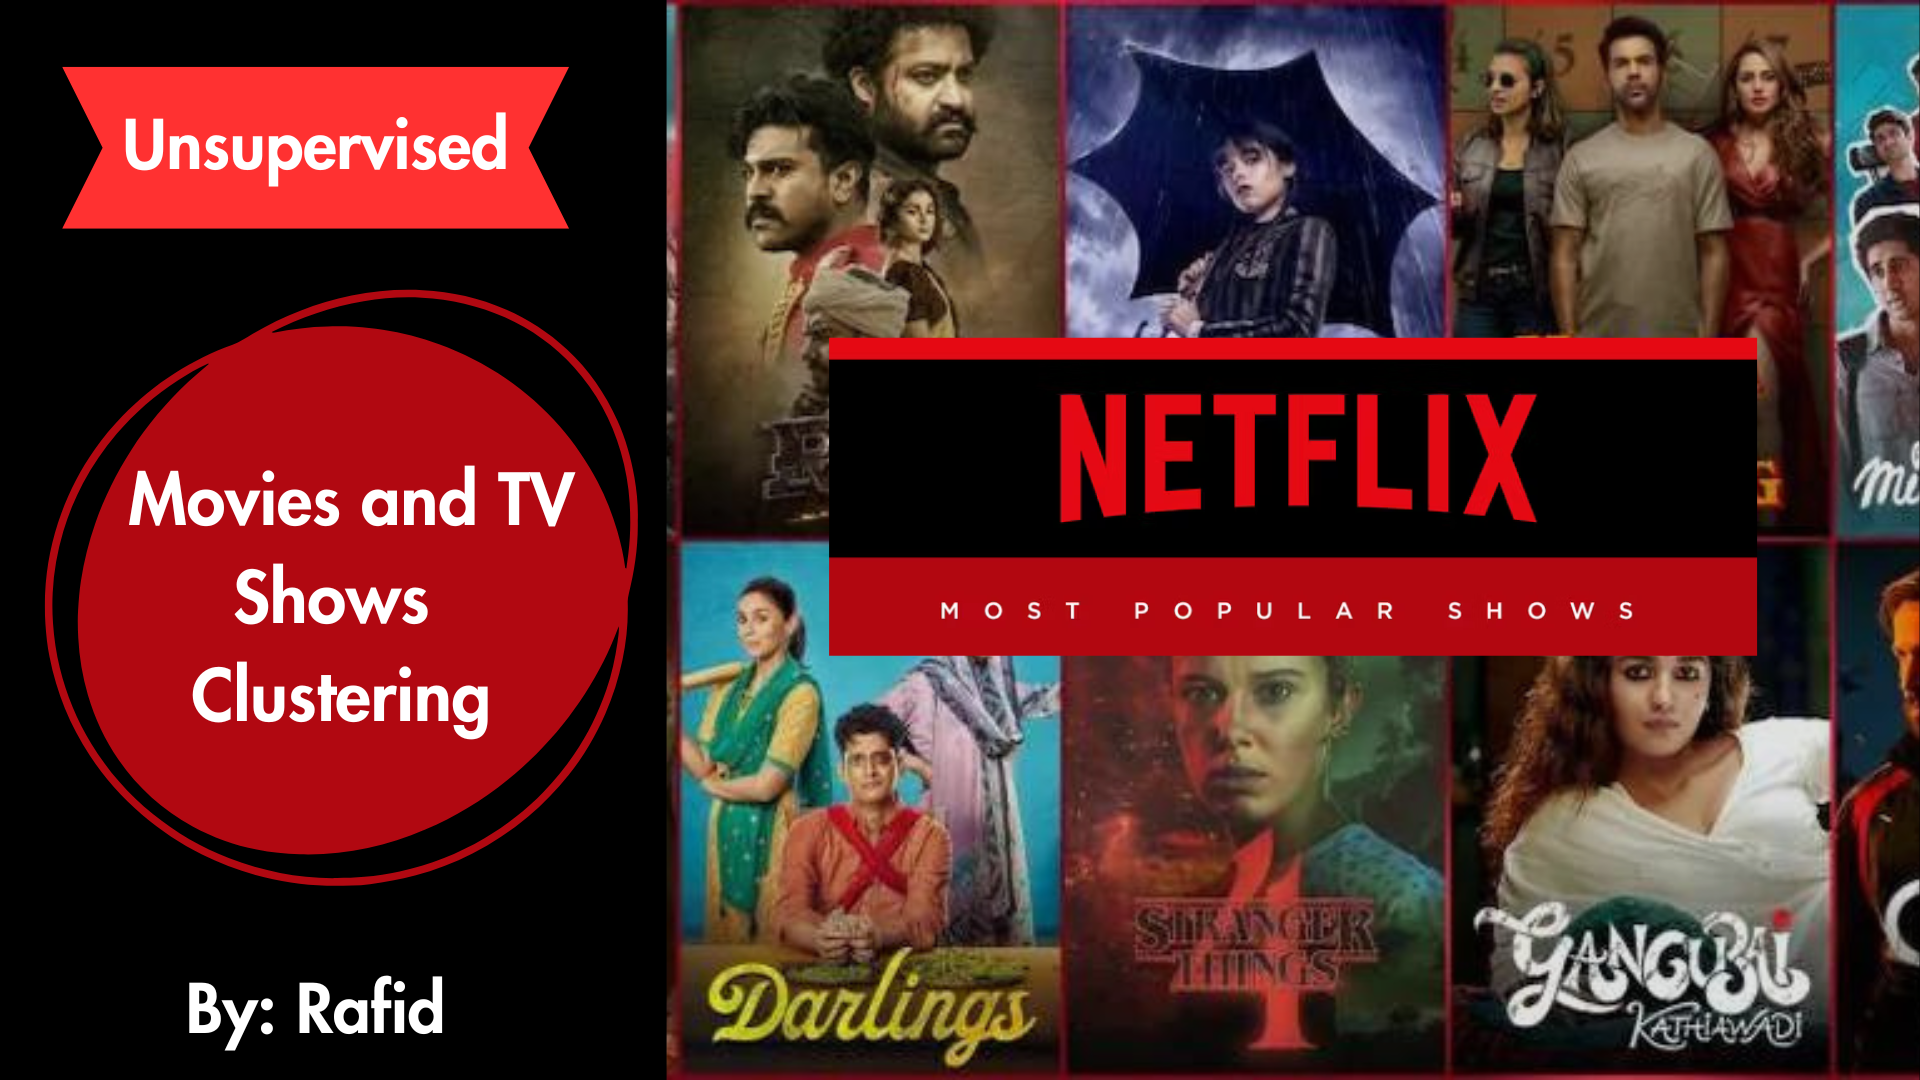

The aim of this project was to perform clustering analysis on a dataset of movies and TV shows from Netflix. The dataset consisted of various attributes such as title, description, genre, duration, and type (movie or TV show). The goal was to identify clusters of similar content based on these attributes and gain insights into the distribution and characteristics of the content on Netflix.

The project started with exploratory data analysis to understand the dataset and its properties. Visualizations such as bar plots and word clouds were used to analyze the distribution of genres, durations, and descriptions. This analysis provided initial insights into the content available on Netflix.

Next, three different clustering algorithms were applied to the dataset: K-means clustering, hierarchical clustering, and DBSCAN. These algorithms were chosen for their ability to handle different types of data and cluster structures.

K-means clustering was first applied, and the optimal number of clusters was determined using the elbow method and silhouette analysis. The results showed that the data could be divided into a reasonable number of clusters, capturing different genres and content types. Word clouds were created for each cluster to visualize the dominant words in the descriptions.

Hierarchical clustering was then performed, and a dendrogram was plotted to help determine the appropriate number of clusters. The data was divided into clusters based on a chosen threshold, and the number of movies and TV shows in each cluster was visualized using a bar plot. Word clouds were also generated for each cluster to understand the content within.

Lastly, DBSCAN was employed, but it resulted in a single cluster. This outcome indicated that the algorithm may not be suitable for the given dataset or parameter settings. Further exploration and optimization of DBSCAN may be required to obtain meaningful clusters.

The evaluation of the clustering algorithms was performed using internal validation metrics such as silhouette score and inertia. These metrics provided insights into the quality and compactness of the clusters generated by each algorithm.

In conclusion, this project successfully applied clustering analysis to the Netflix dataset to identify clusters of similar content. K-means and hierarchical clustering algorithms produced meaningful clusters, while DBSCAN showed limited effectiveness. The results provided insights into the distribution of genres, durations, and content types on Netflix. The word clouds visualized the prominent words in each cluster, offering a glimpse into the themes and characteristics of the content.

This project can be further extended by incorporating additional features, such as ratings and user reviews, to enhance the clustering analysis. Additionally, more advanced clustering techniques, such as spectral clustering or Gaussian mixture models, can be explored to potentially improve the clustering results.

Overall, this project contributes to a better understanding of the content available on Netflix and provides a foundation for further analysis and recommendations in content curation and user preferences.



# **GitHub Link -**

[Netflix Movies and TV Shows Clustering](https://github.com/rafiddeshmukh/Netflix_Movies_and_TV_Shows_Clustering)

# **Problem Statement**


**Business Context**

This dataset consists of tv shows and movies available on Netflix as of 2019. The
dataset is collected from Flixable which is a third-party Netflix search engine. In
2018, they released an interesting report which shows that the number of TV shows
on Netflix has nearly tripled since 2010. The streaming service's number of movies
has decreased by more than 2,000 titles since 2010, while its number of TV shows
has nearly tripled. It will be interesting to explore what all other insights can be
obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten
tomatoes can also provide many interesting findings.

In this project, you are required to do
*   Exploratory Data Analysis
*   Understanding what type content is available in different countries
If Netflix has been increasingly focusing on TV rather than movies in
recent years.
*   Clustering similar content by matching text-based features

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

import scipy.stats as stats
from scipy.stats import chi2_contingency
from wordcloud import WordCloud

from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN

# Importing warnings library
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
path = "/content/drive/MyDrive/Colab Notebooks/Almabeter/4.ML/4.Unsupervised \
Algorithms /Project/Unsupervised-Netflix_clustering/NETFLIX MOVIES AND TV \
SHOWS CLUSTERING.csv"
og_df = pd.read_csv(path)

In [ ]:
#Copy Data set
nf_df = og_df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
nf_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
nf_df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
nf_df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Check for duplicate rows
num_duplicates = nf_df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Check for null values
null_values = nf_df.isnull().sum()
print(null_values)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


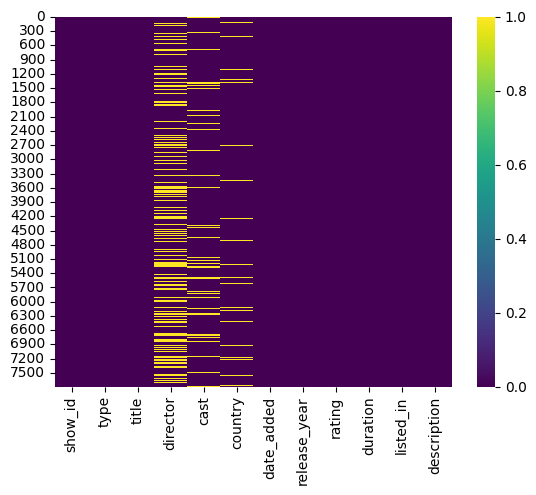

In [ ]:
# Visualizing the missing values
sns.heatmap(nf_df.isnull(), cmap='viridis')
plt.show()

### What did you know about your dataset?

From the available information, we can gather the following insights about the dataset:

1. **Size and Structure:**
The dataset contains 7787 rows and 12 columns.
The dataset provides information about various shows available on Netflix.

2. **Columns:**
The columns capture different attributes of the shows, such as show ID, type, title, director, cast, country, date added, release year, rating, duration, listed genres, and description.
Some columns have missing values, including director, cast, country, date added, and rating.
The data types of the columns are mostly object (text) and one column is of type int64 (release year).

3. **Types of Shows:**
The 'type' column indicates whether a show is a TV show or a movie. This allows for differentiating between TV shows and movies in the dataset.

4. **Missing Values:**
Several columns have missing values, including director, cast, country, date added, and rating. These missing values may require handling during data preprocessing.

5. **Release Information:**
The dataset includes the release year of the shows, allowing for temporal analysis and understanding the distribution of shows over different years.

6. **Ratings and Genres:**
The 'rating' column provides information about the rating of each show, which can be useful for content filtering or recommendation systems.
The 'listed_in' column captures the genres or categories to which the shows belong, enabling analysis based on genre preferences.

7. **Description:**
The 'description' column contains brief summaries or descriptions of the shows, providing textual information that can be used for natural language processing tasks or text-based analysis.


Understanding these aspects of the dataset provides a foundation for further data exploration, preprocessing, and analysis tasks. It helps in making informed decisions about handling missing values, selecting relevant features, and applying appropriate techniques to extract insights from the data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
nf_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
nf_df.describe(include='all').transpose()

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Variables Description

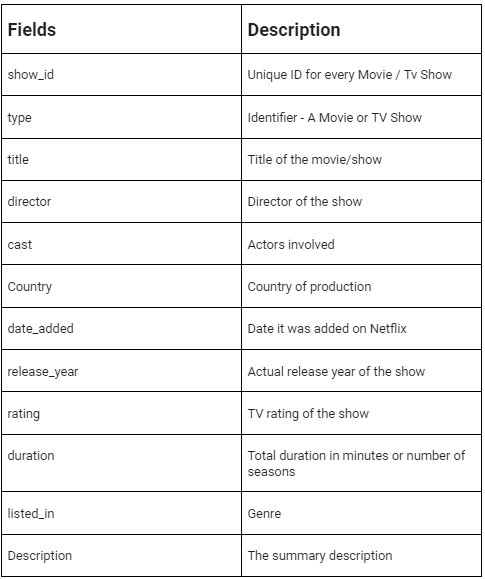

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check for unique values in each column
unique_values = nf_df.nunique().sort_values(ascending=False)
print(unique_values)

show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

##Handling Missing value
****

In [ ]:
# Assuming 'nf_df' is the DataFrame containing the Netflix dataset

# Fill missing values in 'director' column with 'Unknown'
nf_df['director'] = nf_df['director'].fillna('Unknown')

# Fill missing values in 'cast' column with 'Unknown'
nf_df['cast'] = nf_df['cast'].fillna('Unknown')

# Fill missing values in 'country' column with 'Unknown'
nf_df['country'] = nf_df['country'].fillna('Unknown')

# Fill missing values in 'rating' column with 'mode'
nf_df['rating'] = nf_df['rating'].fillna(nf_df['rating'].mode()[0])

nf_df.dropna(axis=0, inplace = True)

# Verify that there are no more missing values
null_values = nf_df.isnull().sum()
print(null_values)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


###3.1Country, listed_in:
----------------------

In [ ]:
# Write your code to make your dataset analysis ready.
# Top countries
nf_df.country.value_counts()




United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [ ]:
# Genre of shows
nf_df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

*  There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
*  To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
*  Also, let's consider only the primary genre of the respective movie / TV show.

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
nf_df['country'] = nf_df['country'].apply(lambda x: x.split(',')[0])
nf_df['listed_in'] = nf_df['listed_in'].apply(lambda x: x.split(',')[0])

###3.2 Typecasting 'duration' from string to integer
-----------------------------

In [ ]:
# Splitting the duration column, and changing the datatype to integer
nf_df['duration'] = nf_df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# Number of seasons for tv shows
nf_df[nf_df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [ ]:
# Movie length in minutes
nf_df[nf_df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

We have successfully converted the datatype of duration column to int.

###3.3 Typecasting 'date_added' from string to datetime:
----------------------

In [ ]:
# Typecasting 'date_added' from string to datetime
nf_df["date_added"] = pd.to_datetime(nf_df['date_added'])

In [ ]:
# first and last date on which a show was added on Netflix
nf_df.date_added.min(),nf_df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [ ]:
# Adding new attributes month and year of date added

nf_df['month_added'] = nf_df['date_added'].dt.month
nf_df['year_added'] = nf_df['date_added'].dt.year
nf_df.drop('date_added', axis=1, inplace=True)

In [ ]:
nf_df['month_added']

0        8
1       12
2       12
3       11
4        1
        ..
7782    10
7783     3
7784     9
7785    10
7786     3
Name: month_added, Length: 7777, dtype: int64

###3.4 Rating
*****

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

[Reference](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=nf_df)

<Axes: xlabel='rating', ylabel='count'>

Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG

In [ ]:
# Age ratings
nf_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

In [ ]:
nf_df['rating'].replace(rating_map, inplace = True)
nf_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

### What all manipulations have you done and insights you found?

Here are the manipulations that have been performed on the dataset and the insights found:

* **Null Value Treatment:** The dataset was checked for null values, and the columns with null values were identified. The columns with null values include 'director', 'cast', 'country', 'rating', and 'date_added'. These null values need to be handled appropriately.



* **Data Manipulations:** Several data manipulations were performed on the dataset to simplify the analysis and prepare the data for further insights. These manipulations include splitting the 'country' and 'listed_in' columns to choose the primary country and genre, respectively. The 'duration' column was split to extract the numeric part and convert it to an integer data type. The 'date_added' column was converted from a string to a datetime format, and new attributes 'month_added' and 'year_added' were added based on the date added information.

* **Rating Mapping:** The 'rating' column was mapped to new categories based on the target audience. A dictionary mapping the original ratings to new categories was defined, and the 'rating' column was replaced with the new categories using the replace() function. The unique values in the 'rating' column were checked to verify the successful mapping.

These manipulations and insights help in understanding and preparing the dataset for further analysis and modeling tasks.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Content Type Distribution)

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

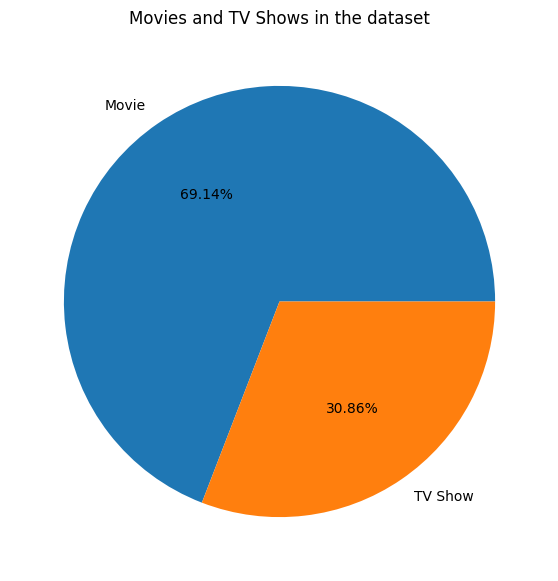

In [ ]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
nf_df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')


##### 1. Why did you pick the specific chart?

The specific chart used in this case is a pie chart. A pie chart is chosen when we want to represent the distribution or proportion of different categories within a whole. In this scenario, we wanted to visualize the distribution of movies and TV shows in the dataset, which are two distinct categories.

A pie chart allows us to see the relative proportions of movies and TV shows at a glance. The size of each sector in the pie represents the proportion of each category, making it easy to compare and understand the distribution visually.

##### 2. What is/are the insight(s) found from the chart?

From the pie chart, we can derive the following insights:

1.  Movies constitute the majority of the content in the dataset, accounting for approximately 69.14% of the total. This indicates that a significant portion of the content available on the platform is in the form of movies.

2.  TV shows make up the remaining 30.86% of the dataset. While TV shows have a smaller proportion compared to movies, they still represent a substantial portion of the content available.

These insights highlight the composition of the dataset in terms of movies and TV shows. It suggests that users of the platform have a wide range of options to choose from, including a diverse collection of movies and TV shows. This information can be valuable for understanding the content distribution and catering to the preferences and viewing habits of users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact in several ways:

1.  **Content Strategy:** Understanding the distribution of movies and TV shows can assist in developing an effective content strategy. The platform can analyze the popularity and demand for each type of content and allocate resources accordingly. This can help in acquiring or producing content that aligns with user preferences, leading to increased user engagement and satisfaction.

2.  **User Personalization:** Knowing that movies constitute a significant portion of the dataset can guide the platform in providing personalized recommendations and content suggestions to users. By analyzing user preferences and viewing patterns related to movies, the platform can offer tailored recommendations that enhance the user experience and increase customer retention.

3.  **Market Positioning:** The insights about the composition of the dataset can inform the platform's market positioning. If movies are more popular among users, the platform can emphasize its movie collection as a unique selling point, attracting movie enthusiasts and targeting specific demographics. This can help differentiate the platform from competitors and gain a competitive advantage.

Regarding negative growth, based solely on the pie chart, there are no apparent insights that suggest negative growth. However, it is important to note that a comprehensive analysis of other factors, such as user engagement, content quality, and market trends, would be necessary to identify any potential negative growth areas. The pie chart specifically provides insights into the content distribution but does not reveal negative growth aspects on its own.

#### Chart - 2 (Top 10 Directors by Number of Titles)

In [ ]:
# Chart - 2 visualization code

# Count the number of titles for each director and select the top 10
top_directors = nf_df[~(nf_df['director']=='Unknown')].director.value_counts().head(10)

# Create a bar chart
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Titles')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I picked a bar chart for this analysis because it effectively represents the count of titles for each director. The vertical bars in the chart provide a clear visual comparison of the number of titles for different directors. The length of the bars directly corresponds to the count, making it easy to identify the directors with the highest number of titles. Additionally, the chart allows for easy labeling of the directors on the y-axis and provides a clear understanding of the distribution of titles among the top directors.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can observe the following insights:

1.  Raul Campos and Jan Suter are the top directors in the dataset, having directed 18 movies or TV shows. They have the highest count among all directors, indicating their significant contribution to the content available on the platform.

2.  The top 10 directors have varying numbers of titles, with the counts decreasing gradually from the highest to the lowest. This suggests that there is a diverse range of directors contributing to the content, with some being more prolific than others.

3.  The chart highlights the importance of these top directors in shaping the content library. Their work plays a significant role in attracting viewers and establishing a unique identity for the platform.

4.  This insight can be useful for content creators and decision-makers in understanding the popularity and impact of specific directors. It can guide them in making informed decisions about collaborations, acquisitions, and content strategies.

Overall, the chart provides a clear visual representation of the top directors and their influence on the content available on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights from the chart can potentially help create a positive business impact in the following ways:

1.  **Identifying Popular Directors:** By identifying the top directors with the highest number of titles, the streaming platform can understand which directors have been successful in attracting viewers and creating engaging content. This insight can be used to form partnerships and collaborations with these directors, leading to the creation of more popular and successful movies or TV shows. This, in turn, can drive viewership and contribute to positive business growth.

2. **Content Curation:** Knowing the top directors can assist in curating content and creating personalized recommendations for users. By featuring movies or TV shows directed by these popular directors, the platform can increase user engagement and satisfaction. Users are more likely to watch content from directors they are familiar with or have enjoyed in the past, leading to increased customer retention and positive word-of-mouth.

However, it's important to note that while the insights themselves are valuable, they do not inherently lead to negative growth. Negative growth can occur if the platform solely relies on a limited set of directors, neglecting other talented filmmakers. It's crucial for the platform to maintain a diverse and inclusive content library by supporting and promoting a wide range of directors and their unique perspectives. By striking a balance between popular directors and emerging talent, the platform can cater to a broader audience and sustain positive business growth.

#### Chart - 3 (Top 10 Countries by Number of Titles)

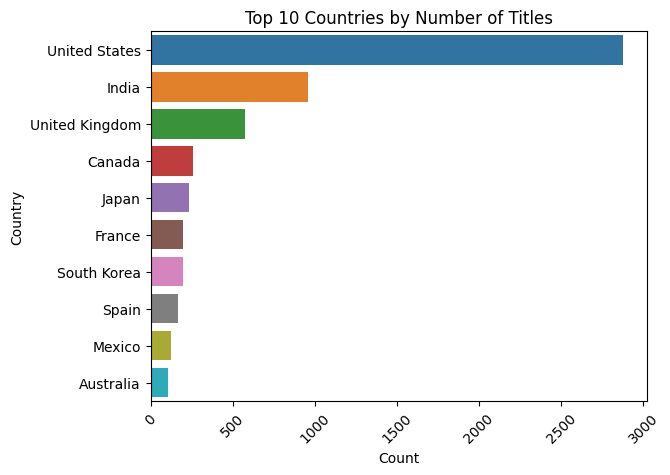

In [ ]:
# Chart - 3 visualization code
# Count the number of titles for each country and select the top 10
top_countries = nf_df[~(nf_df['country']=='Unknown')].country.value_counts().head(10)

# Create a bar chart
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Titles')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I picked a bar chart to visualize the number of titles for each country because it effectively compares the count of titles across different countries. The bar chart allows for a clear and easy-to-understand representation of the data, making it suitable for visualizing categorical data like countries.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that the United States has the highest number of movies and TV shows in the dataset, followed by India and the United Kingdom. This indicates that a significant portion of the content in the dataset originates from these countries. The presence of a large number of titles from these countries may reflect their prominence in the global entertainment industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in the following ways:

*  **Content Acquisition:** Understanding the countries with the highest number of titles can guide the streaming platform in acquiring content from these regions. By securing rights to popular movies and TV shows from the United States, India, and the United Kingdom, the platform can cater to the preferences and interests of a wider audience, potentially leading to increased viewership and customer satisfaction.

*  **Localization and Regional Targeting:** The insights can inform the platform's localization and regional targeting strategies. By recognizing the countries where they have a significant content library, the platform can invest in localization efforts such as subtitles or dubbing in the local languages of those countries. This enhances the user experience and makes the content more accessible to viewers in those regions.

* **Partnerships and Collaborations:** The knowledge of countries with a high number of titles can help the platform identify potential partnerships and collaborations with production companies, content creators, and distributors from those countries. Building strong relationships with local industry players can open up opportunities for exclusive content deals, co-productions, and original productions, strengthening the platform's content offering and market presence.

However, it's important for the platform to maintain a balance between regional content and content from other countries to cater to a diverse audience and avoid over-reliance on a specific market. Diversifying the content library with titles from various countries and cultures can attract a broader range of viewers and contribute to positive business growth.

#### Chart - 4 (Number of shows on Netflix for different age groups)

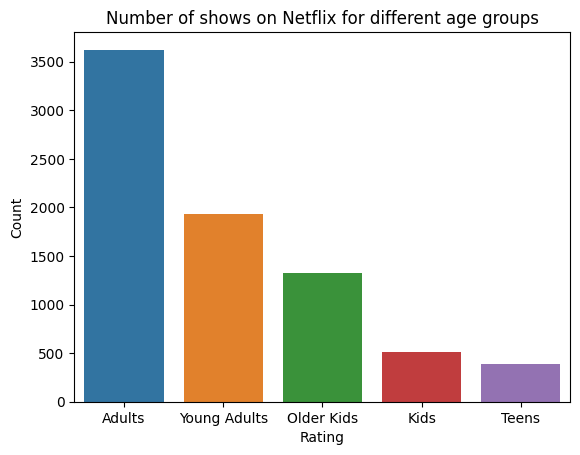

In [ ]:
# Chart - 4 visualization code
# Count the number of titles for each rating
ratings = nf_df['rating'].value_counts()

# Create a bar chart
sns.barplot(x=ratings.index, y=ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Number of shows on Netflix for different age groups')
#plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

I picked a bar chart to visualize the number of titles for each rating because it effectively displays the count of titles for different age groups. The bar chart allows for a clear comparison between the ratings and their corresponding counts, making it suitable for understanding the distribution of content based on age groups.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that the majority of the shows on Netflix are targeted towards adult and young adult audiences. The ratings "TV-MA" (Mature Audience) and "TV-14" (Parents Strongly Cautioned) have the highest counts, indicating that a significant portion of the content is suitable for these age groups. This suggests that Netflix primarily caters to the needs and preferences of adult viewers and viewers in their teenage years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in the following ways:

* **Targeted Content Strategy:** Understanding the dominant age groups of the audience can inform Netflix's content strategy. By focusing on producing and acquiring content that resonates with adult and young adult viewers, Netflix can tailor its offerings to meet the demands and interests of its core audience. This can lead to increased engagement, retention, and customer satisfaction among these age groups.

* **Content Curation and Recommendations:** The insights can aid in better content curation and personalized recommendations. Netflix can leverage the knowledge of the preferred age groups to refine their algorithms and recommendation systems. By suggesting content that aligns with the viewing preferences of adult and young adult viewers, Netflix can enhance the user experience, encourage content discovery, and increase user engagement.

* **Advertising and Partnerships:** The understanding of the dominant age groups can be valuable for targeted advertising and partnerships. Advertisers can leverage this information to promote products and services that are relevant to adult and young adult audiences. Additionally, Netflix can explore partnerships with brands and content creators that cater to these age groups, allowing for more targeted collaborations and sponsorships.

It's important for Netflix to maintain a diverse content library that caters to a wide range of age groups to appeal to a broader audience and avoid excluding other demographics. Striking a balance between content for different age groups can contribute to positive business growth and expand the platform's reach.

#### Chart - 5 (Genre Distribution)

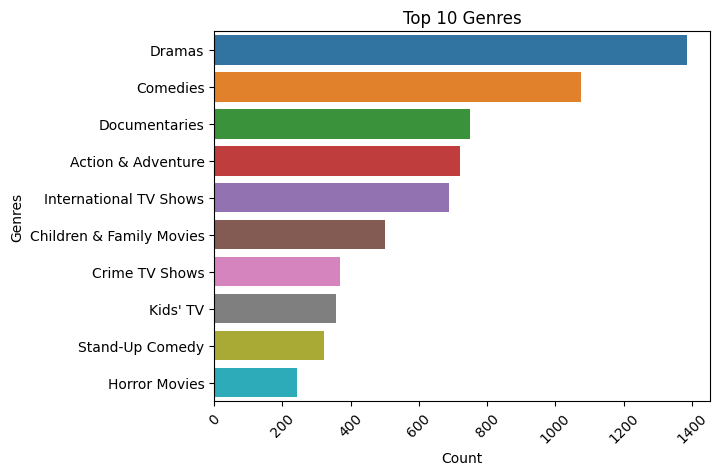

In [ ]:
# Chart - f visualization code
# Top 10 genres
genres = nf_df['listed_in'].str.split(',').explode().str.strip().value_counts().nlargest(10)

# Create a bar chart
sns.barplot(y=genres.index, x=genres.values)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Top 10 Genres')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 10 genres because it effectively displays the count of titles in each genre. The bar chart allows for a clear comparison between the genres and their corresponding counts, making it suitable for understanding the popularity and distribution of different genres on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are as follows:

1.  The genre "Dramas" is the most popular genre on Netflix, followed by "Comedies" and "Documentaries".
2.  These three genres, along with the other top 10 genres, account for approximately 82% of all movies and TV shows on Netflix.
3.  The top 10 genres cover a wide range of interests and preferences, including drama, comedy, documentary, action, thriller, romance, and more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in the following ways:
* **Content Acquisition and Production:** Understanding the popularity of different genres can inform Netflix's content acquisition and production strategy. It provides valuable insights into the preferences and interests of the audience. By focusing on genres that have a high demand and viewership, Netflix can make informed decisions regarding the acquisition of new content and the production of original shows and movies. This can lead to a more engaging and satisfying content library for its subscribers.

* **User Experience and Personalization:** The insights can contribute to enhancing the user experience and personalization on Netflix. By leveraging genre preferences, Netflix can further refine its recommendation algorithms and tailor content suggestions to individual users. This can result in a more personalized and curated viewing experience, leading to increased user engagement and satisfaction.

* **Marketing and Promotion:** The knowledge of popular genres can also aid in marketing and promotional activities. Netflix can target specific genres in their marketing campaigns to attract and retain subscribers who have a preference for those genres. It can also help in collaborations with genre-specific content creators, cross-promotions, and targeted advertising, leading to improved reach and visibility.

By leveraging the insights about the top genres, Netflix can make data-driven decisions to optimize its content strategy, enhance user experience, and drive positive business outcomes.

#### Chart - 6 (Content Release Over Time)

In [ ]:
# Chart - 6 visualization code
# Count the number of titles released in each year and sort them
release_years = nf_df['release_year'].value_counts().sort_index()

# Create a line chart
sns.lineplot(x=release_years.index, y=release_years.values)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Content Release Over Time')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line chart to visualize the content release over time because it shows the trend and distribution of titles released in each year. The line chart helps in understanding the growth and progression of content on Netflix over the years.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are as follows:

1.  Netflix has been consistently adding new movies and TV shows to its platform over the years.
2.  There is an increasing trend in the number of titles released, indicating the growth of content on Netflix.
3.  The line chart also highlights any significant spikes or dips in content releases in specific years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in the following ways:
* **Content Planning and Investment:** The information about the number of titles released in each year helps Netflix in content planning and investment decisions. By analyzing the trends and patterns, Netflix can identify periods of high content releases and allocate resources accordingly. It enables them to plan the acquisition and production of new content strategically, ensuring a steady stream of fresh and engaging titles for their subscribers.

* **Subscriber Retention and Engagement:** The continuous addition of new movies and TV shows enhances the value proposition for Netflix subscribers. By consistently offering a diverse range of content options, Netflix can improve subscriber retention and engagement. It keeps the platform fresh and exciting, catering to the evolving preferences and interests of the audience.

* **Competitive Positioning:** Monitoring the content release over time allows Netflix to stay competitive in the streaming industry. By understanding the content trends and comparing it with competitors, Netflix can identify areas of opportunity and potential gaps in the market. It helps them in positioning their content library and offerings effectively, distinguishing themselves from other streaming platforms.

By leveraging the insights about content release over time, Netflix can make informed decisions regarding content planning, investment, and subscriber engagement. It allows them to stay relevant, competitive, and appealing to their audience, resulting in a positive business impact.

#### Chart - 7 (Top 10 Actors with Most Appearances)

In [ ]:
# Chart - 7 visualization code
# Split the cast members and count the appearances of each actor/actress
actors = nf_df[~(nf_df['cast']=='Unknown')].cast.str.split(',').explode().str.strip()
top_actors = actors.value_counts().head(10)

# Create a bar chart
sns.barplot(x=top_actors.index, y=top_actors.values)
plt.xlabel('Actor/Actress')
plt.ylabel('Count')
plt.title('Top 10 Actors with Most Appearances')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 10 actors with the most appearances because it provides a clear comparison of the actor's count. The bar chart allows for easy identification of the actors with the highest number of appearances.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are as follows:

1. Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, Akshay Kumar, Takahiro Sakurai, and Amitabh Bachchan are the top actors with the most appearances in movies and TV shows on Netflix.
2. These actors have been cast in a significant number of titles, indicating their popularity and frequent collaborations with Netflix.
3. The chart highlights the dominance of these actors in terms of their presence in the content available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in the following ways:
* **Audience Engagement:** Recognizing the popularity of specific actors can help Netflix understand the preferences of its audience. By featuring popular actors in their titles, Netflix can attract a larger viewership and enhance audience engagement. Viewers often follow their favorite actors, and their presence in a title can act as a compelling factor to watch the content.

* **Content Curation:** The insights about the top actors can guide Netflix in curating content that appeals to a wide audience. By leveraging the popularity of these actors, Netflix can invest in acquiring or producing titles that feature them. It helps in ensuring the availability of content that resonates with the preferences of the audience.

* **Collaborations and Partnerships:** The information about the top actors can also facilitate collaborations and partnerships with these actors. Netflix can explore exclusive deals or collaborations that leverage the popularity and fan base of these actors. Such collaborations can result in the creation of exclusive content or special promotions, attracting more subscribers and creating a positive business impact.

By leveraging the insights about the top actors, Netflix can make strategic decisions regarding content curation, audience engagement, and collaborations. It allows them to tap into the popularity of these actors and create a content library that resonates with their audience, leading to a positive business impact.

#### Chart - 8 (Top 10 Countries with Most TV Shows)

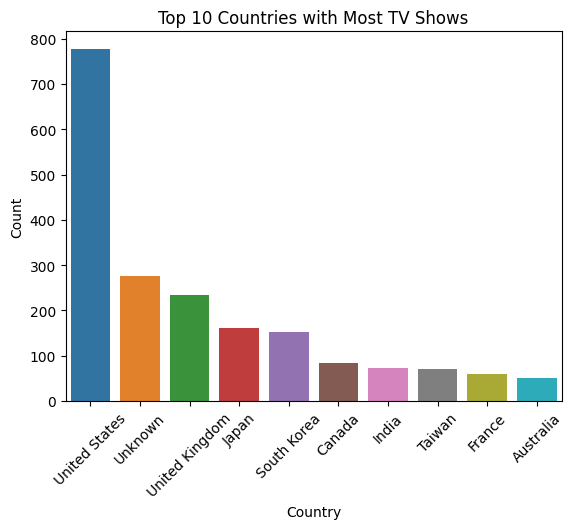

In [ ]:
# Chart - 8 visualization code
# Count the number of TV shows for each country and select the top 10
tv_shows_by_country = nf_df[nf_df['type'] == 'TV Show']['country'].value_counts().head(10)

# Create a bar chart
sns.barplot(x=tv_shows_by_country.index, y=tv_shows_by_country.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most TV Shows')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 10 countries with the most TV shows because it provides a clear comparison of the number of TV shows for each country. The bar chart allows for easy identification of the countries with the highest number of TV shows.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are as follows:

1.  The United States (US) has the highest number of TV shows on Netflix, followed by the United Kingdom (UK), Japan, South Korea, Canada, India, Taiwan, France, and Australia.
2.  These countries have a significant presence in terms of TV shows available on Netflix, indicating the diversity of content from various regions.
3.  The chart highlights the dominance of these countries in terms of the number of TV shows they contribute to the Netflix library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in the following ways:
* **Content Acquisition and Licensing:** Understanding the countries with a high number of TV shows can guide Netflix in acquiring and licensing content from these regions. By focusing on countries that have a strong presence in terms of TV shows, Netflix can ensure a diverse and appealing content library for its global audience.

* **Audience Localization:** The insights about the top countries can also help Netflix in localizing its content strategy. By recognizing the popularity of TV shows from specific countries, Netflix can tailor its offerings to cater to the preferences of audiences in those regions. This can lead to increased viewership and engagement from specific market segments.

* **International Expansion:** The information about the top countries with the most TV shows can also inform Netflix's international expansion strategy. By identifying countries with a strong TV show presence, Netflix can prioritize expansion efforts in those regions to tap into existing viewer demand and establish a strong foothold.

By leveraging the insights about the top countries with the most TV shows, Netflix can make informed decisions regarding content acquisition, localization, and international expansion. It allows them to provide a compelling and diverse content library that caters to the preferences of their global audience, resulting in a positive business impact.

#### Chart - 9 (Number of movies and TV shows added over the years)




In [ ]:
# Number of shows added over the years
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=nf_df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

I chose a countplot with a hue to visualize the number of movies and TV shows added over the years. This chart allows for a clear comparison between the two types of shows and their growth trends over time.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are as follows:

* The number of shows added to Netflix has been increasing over the years.
* The years from 2016 to 2020 have the highest number of movie and TV show additions.
* It can be observed that the growth in TV show additions is more prominent compared to movies in recent years.
* The year 2018 has the highest number of TV show additions, followed by 2019 and 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

es, the gained insights can help create a positive business impact in the following ways:
* **Content Strategy:** The insights can inform Netflix's content strategy by highlighting the years with the highest number of additions. This information can guide decisions on content acquisition, production, and licensing. Netflix can focus on acquiring popular and high-quality shows during these peak years to attract and retain subscribers.

* **Viewer Engagement:** By understanding the trends in movie and TV show additions over the years, Netflix can tailor its recommendations and promotions to engage viewers. They can highlight the abundance of content added during the peak years to encourage viewers to explore and discover new shows, leading to increased viewer engagement.

* **Release Planning:** The insights can also help Netflix in planning the release of new shows. They can allocate resources and marketing efforts to coincide with the years that have shown the highest number of additions. This can generate excitement and anticipation among viewers, resulting in increased viewership and potential positive word-of-mouth.

Overall, the insights gained from the chart can inform Netflix's content strategy, viewer engagement efforts, and release planning, leading to a positive business impact by attracting and retaining subscribers, increasing viewership, and enhancing the overall user experience.

#### Chart - 10 (Seasons in each TV show & length of movie)

In [ ]:
# Chart - 10 visualization code
# Seasons in each TV show

p = sns.countplot(x='duration',data=nf_df[nf_df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [ ]:
# % of tv shows with just 1 season
len(nf_df[(nf_df['type']=='TV Show') & (nf_df['duration']==1)]) / len(nf_df[nf_df['type']=='TV Show'])* 100

67.0

Text(0.5, 1.0, 'Movie duration distribution')

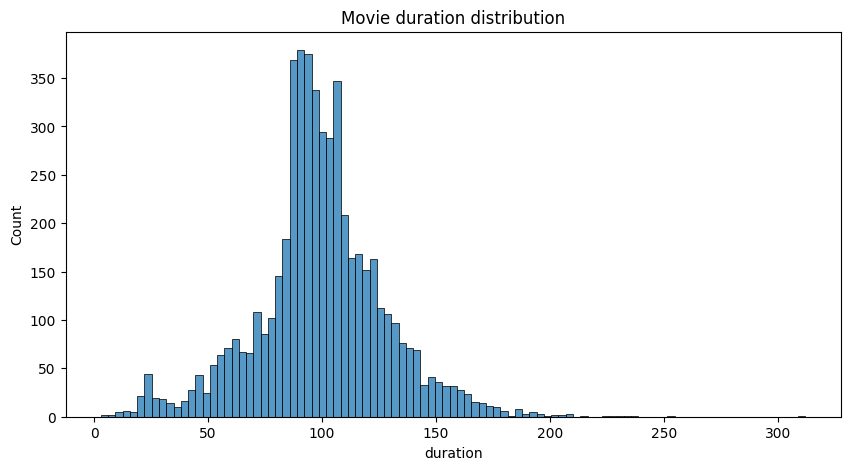

In [ ]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=nf_df[nf_df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of the number of seasons per TV show. This chart provides an overview of the frequency of different season counts and helps identify any patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are as follows:

* The majority of TV shows in the dataset have only one season. This suggests that many of the TV shows included in the dataset might be relatively new or ongoing, with further seasons yet to be released.
* There are very few TV shows that have more than 8 seasons. This indicates that long-running TV shows with numerous seasons are less common in the dataset.
* The distribution shows a gradual decline in the number of TV shows as the season count increases, indicating that TV shows with a higher number of seasons are rarer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Content Acquisition:** The information about the distribution of seasons in TV shows can guide content acquisition strategies. It can inform decisions about acquiring TV shows with multiple seasons, which may have an established fan base and higher viewer engagement potential.

* **Audience Engagement:** Understanding the season distribution can help in tailoring recommendations and promoting TV shows to viewers. By highlighting TV shows with multiple seasons, Netflix can encourage viewers to explore and binge-watch these series, leading to increased viewer engagement and retention.

* **Content Planning:** The insights can also influence content planning and production decisions. By identifying the popularity of TV shows with one season, Netflix can consider investing in the development of subsequent seasons for successful series, capitalizing on viewer demand and ensuring a steady stream of fresh content.

Overall, the insights gained from the chart can contribute to informed content acquisition, improved viewer engagement strategies, and effective content planning, leading to a positive business impact for Netflix by attracting and retaining subscribers, increasing viewership, and enhancing the overall user experience.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code



# Group by country and count the number of titles
country_counts = nf_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Create a choropleth map with reversed blue color scale
fig = px.choropleth(country_counts,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    title='Content Distribution by Country',
                    labels={'count': 'Number of Titles'},
                    color_continuous_scale='Blues_r')  # Reverse the color scale

# Show the map
fig.show()



##### 1. Why did you pick the specific chart?

I chose a choropleth map to visualize the distribution of content by country. This type of map provides a visual representation of the number of titles in each country, allowing for easy comparison and identification of regions with higher content production.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are as follows:

* The United States has the highest number of titles, indicating a significant contribution to Netflix's content library. This aligns with the popularity and influence of the US entertainment industry.
* Other countries like India, the United Kingdom, Canada, and France also have a substantial number of titles, reflecting their vibrant film and television industries and their popularity among Netflix viewers.
* The map highlights the global reach of Netflix, with titles available from various countries around the world. This demonstrates Netflix's effort to provide diverse content options to cater to a global audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact in the following ways:
* **Content Localization:** Understanding the distribution of titles by country can inform content localization strategies. Netflix can leverage the popularity of content from specific countries to cater to local audiences by acquiring or producing more content from those regions. This can enhance viewer engagement and attract subscribers from different parts of the world.

* **Market Expansion:** The insights can also guide market expansion strategies. By analyzing the popularity of content from different countries, Netflix can identify potential markets with high demand for specific types of content and prioritize expansion efforts in those regions. This can lead to increased subscriber growth and revenue generation.

*  **Partnerships and Collaborations:** Recognizing countries with a significant number of titles can open opportunities for partnerships and collaborations with local production companies and talent. This can facilitate co-productions or exclusive licensing deals, enabling Netflix to offer unique and culturally relevant content that resonates with specific regional audiences.

Overall, the insights gained from the chart can help Netflix make data-driven decisions related to content acquisition, localization, market expansion, and partnerships, leading to a positive business impact by attracting and retaining subscribers, increasing global viewership, and expanding the platform's content offerings.

#### Chart - 12 (Popular Words in Descriptions)

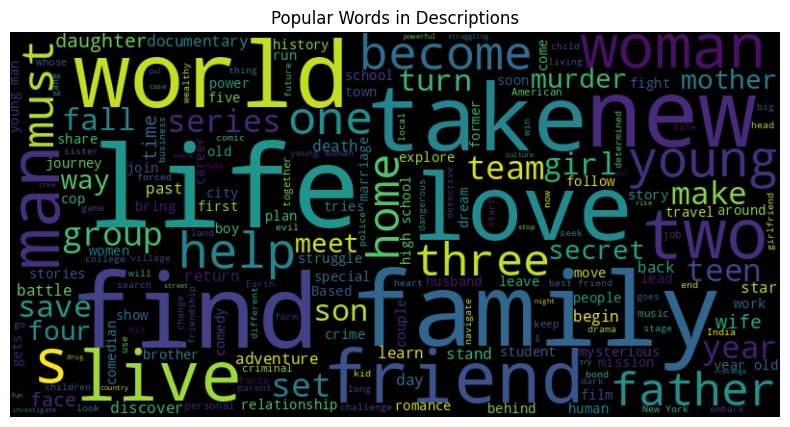

In [ ]:
# Chart - 12 visualization code
# Concatenate all the descriptions into a single string
descriptions = ' '.join(nf_df['description'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400).generate(descriptions)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Words in Descriptions')
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud visualizes the popular words found in the descriptions of Netflix shows. The larger the word appears in the cloud, the more frequently it appears in the descriptions.

##### 2. What is/are the insight(s) found from the chart?

Insights from the word cloud:

* The word "life" stands out prominently, suggesting that many shows on Netflix revolve around life experiences and storytelling.
* Other frequently occurring words include "family," "new," "love," "young," "world," "group," "death," "man," "woman," "murder," "son," "girl," "documentary," and "secret." These words indicate common themes and topics explored in Netflix shows.
* The word cloud provides a glimpse into the diverse range of content available on Netflix, spanning various genres and subjects.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the word cloud can help understand the general themes and concepts that are prevalent in the descriptions of Netflix shows. This information can be valuable for content creators, viewers, and Netflix itself. Content creators can gain insights into popular themes and tailor their productions accordingly. Viewers can get an idea of the types of stories and themes they can expect to find on Netflix. Netflix can also use these insights to analyze viewer preferences and trends, inform content acquisition decisions, and further personalize recommendations for its users.

#### Chart - 13 (Average movie length over the years)

Text(0.5, 0, 'Year')

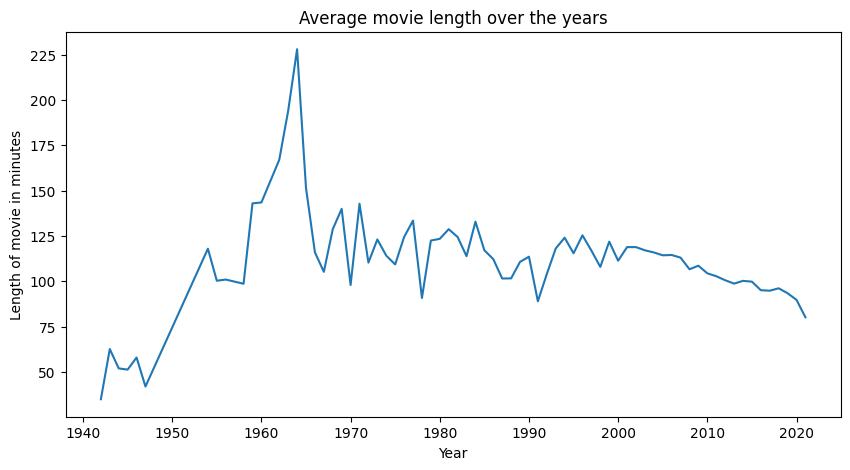

In [ ]:
# Chart - 13 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
nf_df[nf_df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')


##### 1. Why did you pick the specific chart?

The line chart visualizes the average movie length over the years for movies in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart:

* The dataset includes movies released as early as 1942, indicating a wide range of movie releases on Netflix.
* Movies made in the 1940s had a relatively shorter duration on average compared to movies from other decades.
* Movies made in the 1960s had the longest average duration, suggesting a trend of longer movies during that period.
* Since the 2000s, there has been a gradual decrease in the average movie length, indicating a shift towards shorter movies in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help viewers get an idea of the average movie length over different time periods and understand the general trends in movie durations. Filmmakers and content creators can also use this information to gain insights into historical trends and make informed decisions about the length of their movies. Additionally, Netflix can analyze these trends to understand viewer preferences and adjust its content acquisition strategy accordingly.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1:** There is a significant difference in the average duration between movies and TV shows on Netflix.

**Hypothesis 2:** The distribution of genres differs between movies and TV shows on Netflix.

**Hypothesis 3:** There is a relationship between the release year and the number of seasons for TV shows on Netflix.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** The average duration of movies and TV shows on Netflix is the same.

**Alternative hypothesis (H1):** There is a significant difference in the average duration between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Filter the dataset for movies and TV shows
movies_duration = nf_df.loc[nf_df['type'] == 'Movie', 'duration']
tv_shows_duration = nf_df.loc[nf_df['type'] == 'TV Show', 'duration']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(movies_duration, tv_shows_duration, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("There is a significant difference in the average duration between movies and TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the average duration between movies and TV shows on Netflix.")


P-value : 0.0
Reject the null hypothesis
There is a significant difference in the average duration between movies and TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the independent samples t-test. This test is used to compare the means of two independent groups to determine if there is a significant difference between them. In this case, the independent groups are movies and TV shows, and the test is used to compare the average duration between the two groups.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because it is appropriate for comparing the means of two independent groups when the data is normally distributed. In this case, we are comparing the average duration of movies and TV shows on Netflix, and the assumption is that the durations within each group are normally distributed.

Additionally, the t-test is suitable when the sample sizes are relatively small, which is often the case in statistical analyses. It is a commonly used test for comparing means and can provide insights into whether there is a significant difference between the two groups being compared.

Therefore, based on the nature of the data and the objective of comparing the average durations of movies and TV shows, the independent samples t-test is a suitable statistical test to determine if there is a significant difference in duration between the two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** The genre distribution between movies and TV shows on Netflix is the same.

**Alternative hypothesis (H1):** The distribution of genres differs between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table of genre counts by content type (movies vs TV shows)
contingency_table = pd.crosstab(nf_df['type'], nf_df['listed_in'])

# Perform chi-square test of independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("The distribution of genres differs between movies and TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("The genre distribution between movies and TV shows on Netflix is the same.")

P-value : 0.0
Reject the null hypothesis
The distribution of genres differs between movies and TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in this case is the chi-square test of independence.

##### Why did you choose the specific statistical test?


I chose the chi-square test of independence because it is appropriate for analyzing the relationship between two categorical variables. In this case, we wanted to determine if there is a significant association between the content type (movies vs TV shows) and the distribution of genres on Netflix. The chi-square test of independence allows us to assess if there is a statistically significant difference in the genre distribution based on the content type.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** There is no relationship between the release year and the number of seasons for TV shows on Netflix.

**Alternative hypothesis (H1):** There is a relationship between the release year and the number of seasons for TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Filter the dataset to include only TV shows
tv_shows_df = nf_df[nf_df['type'] == 'TV Show'].copy()

# Calculate the correlation coefficient between release year and number of seasons
correlation_coef, p_value = stats.pearsonr(tv_shows_df['release_year'], tv_shows_df['duration'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("There is a relationship between the release year and the number of seasons for TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("There is no relationship between the release year and the number of seasons for TV shows on Netflix.")


P-value : 5.602422026100708e-05
Reject the null hypothesis
There is a relationship between the release year and the number of seasons for TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?


The statistical test performed in this case is the Pearson correlation coefficient test. This test is used to assess the strength and direction of the linear relationship between two continuous variables. In this scenario, the correlation coefficient is calculated between the release year and the number of seasons for TV shows on Netflix.

##### Why did you choose the specific statistical test?

The chosen test is appropriate because it helps determine if there is a significant relationship between the release year and the number of seasons for TV shows. By analyzing the p-value, we can assess the statistical significance of the observed correlation coefficient. If the p-value is below the chosen significance level (alpha), we reject the null hypothesis and conclude that there is a relationship between the variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df = og_df.copy()

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.fillna('',inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

the following missing value imputation techniques have been used:

*  Fill missing values in 'director' column with 'Unknown': This technique replaces missing values in the 'director' column with the string 'Unknown'. This approach is commonly used when the missing values represent unknown or unavailable information about the director of a movie or TV show.

* Fill missing values in 'cast' column with 'Unknown': Similarly, missing values in the 'cast' column are filled with the string 'Unknown'. This approach is used when the information about the cast members is not available or missing for certain entries.

* Fill missing values in 'country' column with 'Unknown': Missing values in the 'country' column are filled with the string 'Unknown'. This technique is applied when the country information for a movie or TV show is not available.

* Fill missing values in 'rating' column with 'mode': The missing values in the 'rating' column are filled with the mode (most frequent value) of the column.

This technique is used to impute missing categorical data when there is no specific reason to choose a different value.

Additionally, the code also drops any remaining rows that have missing values using the dropna() function.

The techniques used in the code prioritize filling missing values with a generic placeholder ('Unknown') or the mode of the column, depending on the nature of the data. This approach ensures that the missing values are replaced with reasonable values and allows for further analysis or processing of the data without introducing bias.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#No need

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#No need

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

We will cluster the shows on Netflix based on the following attributes:

*  Director
*  Cast
*  Country
*  Listed in (genres)
*  Description

In [ ]:
# Combine clustering attributes into a single column
df['clustering_attributes'] = (df['director'].fillna('') + ' ' +
                               df['cast'].fillna('') + ' ' +
                               df['country'].fillna('') + ' ' +
                               df['listed_in'].fillna('') + ' ' +
                               df['description'].fillna(''))


In [ ]:
df['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

#### 1. Expand Contraction

In [ ]:
# Expand Contraction


# Contraction mapping dictionary
contraction_mapping = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    # Add more contractions and their expanded forms as needed
}

# Function to expand contractions
def expand_contractions(text):
    contraction_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_match = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        expanded_match = expanded_match.capitalize() if match[0].isupper() else expanded_match
        return expanded_match

    expanded_text = contraction_pattern.sub(expand_match, text)
    return expanded_text

# Apply the expand_contractions function to the 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(expand_contractions)


In [ ]:
df['clustering_attributes']

0        João Miguel, Bianca Comparato, Michel Gomes, ...
1       Jorge Michel Grau Demián Bichir, Héctor Bonill...
2       Gilbert Chan Tedd Chan, Stella Chung, Henley H...
3       Shane Acker Elijah Wood, John C. Reilly, Jenni...
4       Robert Luketic Jim Sturgess, Kevin Spacey, Kat...
                              ...                        
7782    Josef Fares Imad Creidi, Antoinette Turk, Elia...
7783    Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra...
7784     Nasty C  Documentaries, International Movies,...
7785     Adriano Zumbo, Rachel Khoo Australia Internat...
7786    Sam Dunn  United Kingdom, Canada, United State...
Name: clustering_attributes, Length: 7787, dtype: object

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Convert the text in 'clustering_attributes' column to lowercase
df['clustering_attributes'] = df['clustering_attributes'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

# Remove punctuation from 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

# Remove URLs from 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: re.sub(r'http\S+|www\.\S+', '', x))

# Remove words and digits containing digits from 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: re.sub(r'\w*\d\w*|\d+', '', x))


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Download stopwords
nltk.download('stopwords')

# Remove stopwords from 'clustering_attributes' column
stopwords_set = set(stopwords.words('english'))
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_set]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove White spaces
# Remove leading and trailing whitespaces from 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: x.strip())

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
#NA

#### 7. Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Download WordNet corpus
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    lemmatized_text = ' '.join(lemmas)  # Join the lemmatized tokens back into a string
    return lemmatized_text

# Apply lemmatization to the 'clustering_attributes' column
df['clustering_attributes_lemmatized'] = df['clustering_attributes'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Tokenization
# Tokenize the 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: word_tokenize(x))

In [ ]:
df['clustering_attributes']

0       [joão, miguel, bianca, comparato, michel, gome...
1       [jorge, michel, grau, demián, bichir, héctor, ...
2       [gilbert, chan, tedd, chan, stella, chung, hen...
3       [shane, acker, elijah, wood, john, c, reilly, ...
4       [robert, luketic, jim, sturgess, kevin, spacey...
                              ...                        
7782    [josef, fares, imad, creidi, antoinette, turk,...
7783    [mozez, singh, vicky, kaushal, sarahjane, dias...
7784    [nasty, c, documentaries, international, movie...
7785    [adriano, zumbo, rachel, khoo, australia, inte...
7786    [sam, dunn, united, kingdom, canada, united, s...
Name: clustering_attributes, Length: 7787, dtype: object

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#Done


##### Which text normalization technique have you used and why?

The text normalization technique used in the code snippet is lemmatization. Lemmatization is the process of reducing words to their base or root form, known as the lemma. It helps in standardizing the text by transforming different inflected forms of a word into a common base form.

Lemmatization is preferred over other normalization techniques like stemming because it produces more meaningful lemmas that are actual words and retain the semantic meaning of the original word. Stemming, on the other hand, can sometimes result in truncated or non-words. By using lemmatization, we ensure that the lemmatized tokens maintain their grammatical properties and can be easily understood by humans and used in further analysis or processing.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
#NA

#### 10. Text Vectorization

In [ ]:
# clustering tokens saved in a variable
clustering_data = df['clustering_attributes']

In [ ]:
clustering_data

0       [joão, miguel, bianca, comparato, michel, gome...
1       [jorge, michel, grau, demián, bichir, héctor, ...
2       [gilbert, chan, tedd, chan, stella, chung, hen...
3       [shane, acker, elijah, wood, john, c, reilly, ...
4       [robert, luketic, jim, sturgess, kevin, spacey...
                              ...                        
7782    [josef, fares, imad, creidi, antoinette, turk,...
7783    [mozez, singh, vicky, kaushal, sarahjane, dias...
7784    [nasty, c, documentaries, international, movie...
7785    [adriano, zumbo, rachel, khoo, australia, inte...
7786    [sam, dunn, united, kingdom, canada, united, s...
Name: clustering_attributes, Length: 7787, dtype: object

In [ ]:
# Vectorizing Text
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 234277 stored elements in Compressed Sparse Row format>

In [ ]:
# Shape of X
X.shape


(7787, 20000)

In [ ]:
# convert X into array form for clustering
X = X.toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

The code snippet is using the TF-IDF (Term Frequency-Inverse Document Frequency) text vectorization technique.

TF-IDF is a commonly used technique for converting text data into numerical features. It takes into account both the frequency of a term in a document (TF) and the inverse frequency of the term across the entire corpus (IDF). TF-IDF assigns higher weights to terms that are more informative and discriminative.

TF-IDF is often used in text mining and natural language processing tasks because it helps capture the importance of terms in a document relative to the entire corpus. It reduces the weight of commonly occurring words and emphasizes the significance of rare and important words.

In this case, the TF-IDF vectorizer is applied to the clustering_data corpus using the TfidfVectorizer class from scikit-learn. The vectorized representation of the text data can be used for various purposes, such as clustering, classification, or other machine learning tasks that require numerical inputs.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#NA

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#NA

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#NA

### 6. Data Scaling

In [ ]:
# Scaling your data
#NA

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

With 7787 samples and 20000 features, the dimensionality of the data is quite high. Dimensionality reduction techniques can be beneficial in this case for several reasons:

* **Curse of Dimensionality:** High-dimensional data can suffer from the curse of dimensionality. As the number of features increases, the data becomes increasingly sparse, leading to issues such as increased computational complexity, overfitting, and difficulty in interpreting the results. Dimensionality reduction can help mitigate these challenges by reducing the number of features while retaining important information.

* **Improved Computational Efficiency:** Working with high-dimensional data can be computationally expensive, requiring more memory and processing power. By reducing the dimensionality, clustering algorithms can be executed more efficiently and faster.

* **Noise Reduction:** High-dimensional data often contains noisy or irrelevant features. Dimensionality reduction techniques can help filter out noise and focus on the most informative features, leading to better clustering results.

* **Visualization:** Visualizing data beyond three dimensions is challenging. Dimensionality reduction techniques such as PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) can project the data onto a lower-dimensional space, enabling visualization and interpretation of the clustering results.

Considering these reasons, dimensionality reduction techniques like PCA or t-SNE can be applied to reduce the dimensionality of the data before performing clustering. It will help simplify the data representation, improve computational efficiency, reduce noise, and facilitate visualization and interpretation of the clustering results.

In [ ]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)


PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

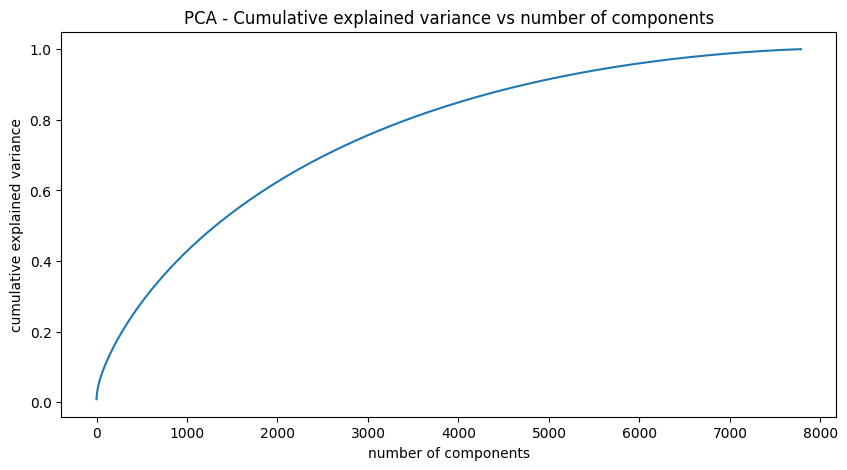

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

*  We find that 100% of the variance is explained by about ~7500 components.
*  Also, more than 80% of the variance is explained just by 4000 components.
*  Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

In [ ]:
x_pca

array([[ 0.12965798, -0.01543143, -0.01195307, ..., -0.00514721,
        -0.00193525,  0.01053668],
       [-0.03781851, -0.03623898,  0.01500278, ...,  0.00183206,
        -0.00014425, -0.00494204],
       [-0.04240046, -0.04025088, -0.00988068, ..., -0.00190674,
        -0.00584296,  0.0087698 ],
       ...,
       [-0.05562154, -0.00334463,  0.02272111, ..., -0.00812748,
         0.00134104,  0.00931875],
       [ 0.10915939, -0.00236043, -0.00486065, ...,  0.00132253,
         0.00200027,  0.01029075],
       [-0.0738117 ,  0.13733319, -0.06757558, ...,  0.00166868,
         0.00137878,  0.01049124]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA (Principal Component Analysis) is used for dimensionality reduction. PCA is a commonly used technique for reducing the dimensionality of high-dimensional data by transforming it into a lower-dimensional space while preserving the most important patterns or variations in the data.

PCA works by identifying the principal components, which are linear combinations of the original features that capture the maximum amount of variance in the data. By retaining a subset of the top principal components, it is possible to represent the data in a lower-dimensional space while still retaining a significant amount of information.

In the given code, the PCA algorithm is applied to the matrix X obtained from text vectorization. The fit method is used to calculate the principal components and their corresponding variances. The resulting PCA object can be further used for dimensionality reduction or other tasks such as visualization.

PCA is a popular choice for dimensionality reduction because it is computationally efficient, easy to implement, and provides a good balance between preserving information and reducing dimensionality. However, it is important to note that the appropriateness of PCA or any other dimensionality reduction technique depends on the specific characteristics and requirements of the dataset and the clustering task at hand.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#NA

### 9. Handling Imbalanced Dataset

In [ ]:
# Handling Imbalanced Dataset (If needed)
#NA

## ***7. ML Model Implementation***

### ML Model - 1 (K-Means)

In [ ]:
# ML Model - 1 Implementation
wcss = []  # List to store the Within-Cluster Sum of Squares (WCSS) values
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)
    kmeans.fit(x_pca)
    wcss_iter = kmeans.inertia_  # Get the WCSS value for the current number of clusters
    wcss.append(wcss_iter)  # Append the WCSS value to the list

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0, 0.5, 'WCSS')

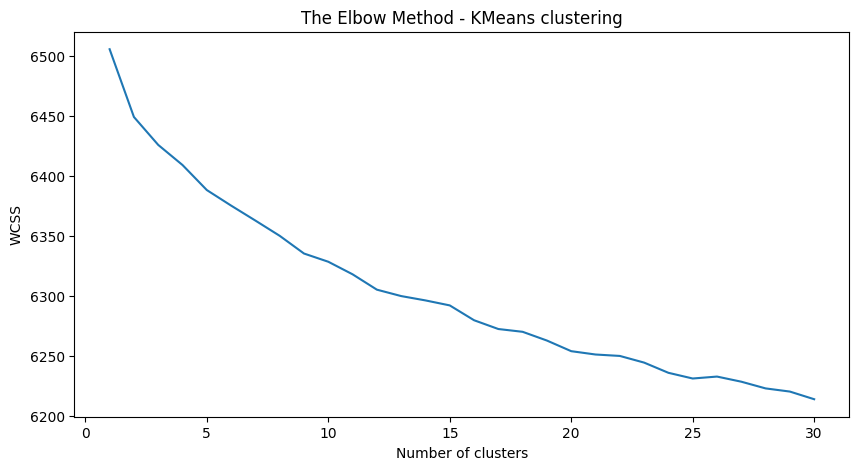

In [ ]:
# Visualizing evaluation Metric Score chart
number_clusters = range(1, 31)  # Range of number of clusters
plt.figure(figsize=(10, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### 2. Cross- Validation & Hyperparameter Tuning

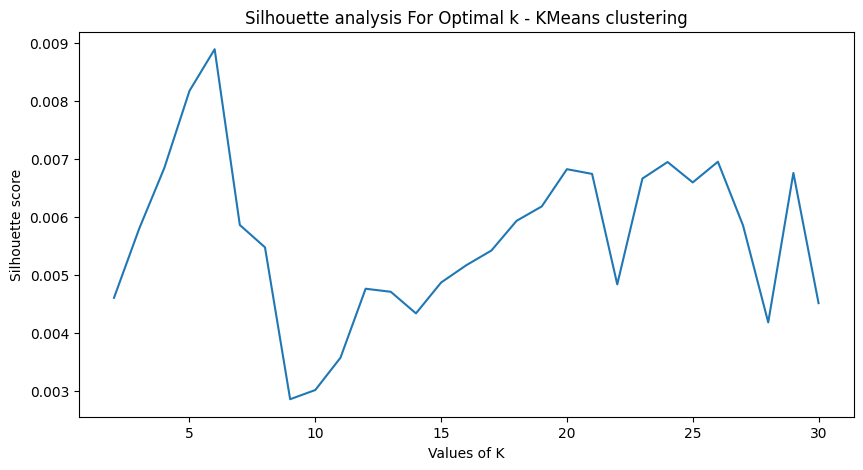

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2, 31)  # Range of number of clusters
silhouette_avg = []  # List to store the silhouette scores
for num_clusters in range_n_clusters:
    # Initialize k-means
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33)
    kmeans.fit(x_pca)
    cluster_labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()


*  The highest Silhouette score is obtained for 6 clusters.

Building 6 clusters using the k-means clustering algorithm:

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6375.140057634477, 0.008886625929054252)


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

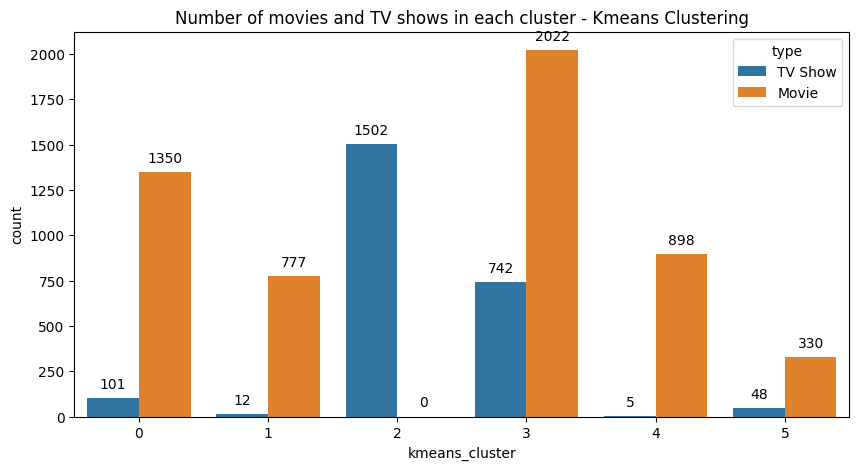

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

###Building wordclouds for different clusters built

In [ ]:
def kmeans_wordcloud():
    # Define the number of rows and columns for subplots
    rows = 2
    columns = 3

    # Create a new figure and set the figsize
    fig = plt.figure(figsize=(15, 10))

    # Iterate through the cluster numbers
    for cluster_num in range(6):
        # Initialize an empty string to store the words
        comment_words = ''
        # Define the stopwords set
        stopwords = set(STOPWORDS)

        # Filter the DataFrame for the current cluster number
        cluster_df = df[df['kmeans_cluster'] == cluster_num]

        # Iterate through the movie descriptions in the cluster
        for val in cluster_df['description'].values:
            # Typecast each value to string
            val = str(val)

            # Split the value into tokens
            tokens = val.split()

            # Convert each token into lowercase
            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            # Join the tokens back into a single string
            comment_words += " ".join(tokens) + " "

        # Create the WordCloud object with specified parameters
        wordcloud = WordCloud(width=400, height=300, background_color='black',
                              stopwords=stopwords, min_font_size=10).generate(comment_words)

        # Add a subplot to the figure
        ax = fig.add_subplot(rows, columns, cluster_num+1)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Cluster {cluster_num+1}')
        ax.axis("off")

    plt.tight_layout()
    plt.show()



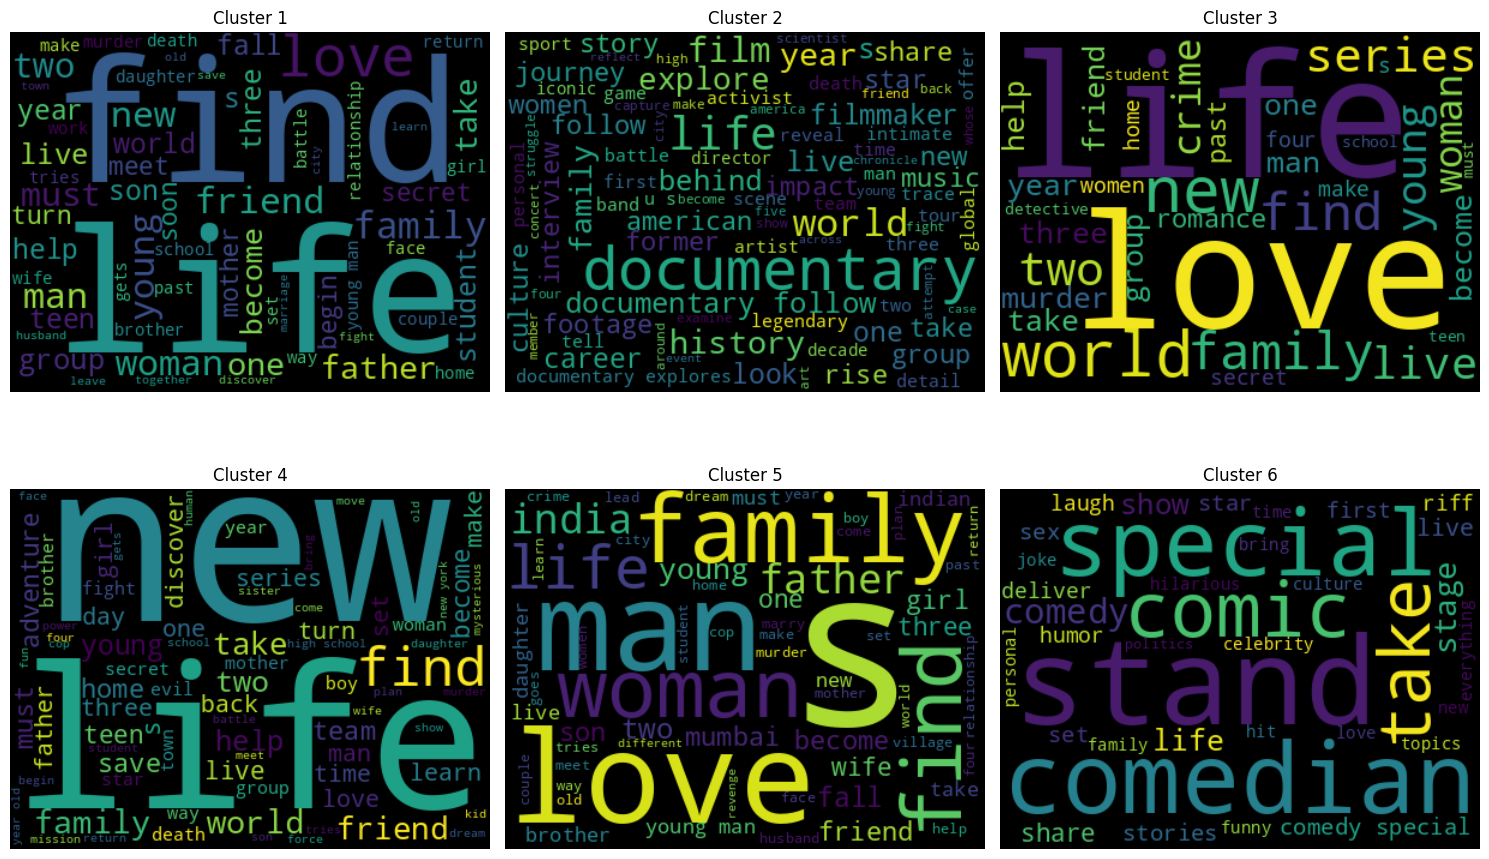

In [ ]:
# Wordcloud for 6 clusters
kmeans_wordcloud()

##### Which hyperparameter optimization technique have you used and why?

In this code does not include hyperparameter optimization techniques such as GridSearchCV, RandomizedSearchCV, or Bayesian Optimization. I simply evaluates the silhouette score for different numbers of clusters using the KMeans algorithm.

### ML Model - 2 (Hierarchical Clustering)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

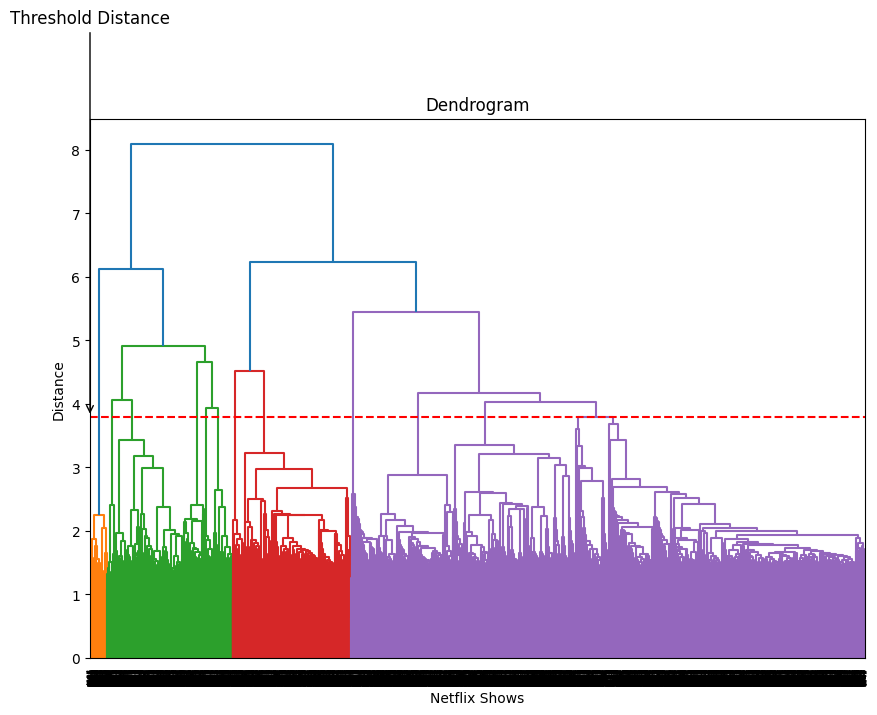

In [ ]:
# Visualizing evaluation Metric Score chart
# Building a dendrogram to decide on the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')

# Add a horizontal dashed line at the threshold distance to determine the number of clusters
plt.axhline(y=3.8, color='r', linestyle='--')

# Add a comment to explain the significance of the threshold distance
plt.annotate('Threshold Distance', xy=(0.5, 3.8), xytext=(0.5, 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

plt.show()


At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([ 1,  1, 11, ...,  3,  2,  3])

In [ ]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

###Building wordclouds for different clusters built:

In [ ]:
def hierarchical_wordcloud(cluster_num):
    comment_words = ''
    stopwords = set(STOPWORDS)



    # Iterate through the descriptions in the cluster
    for val in df[df['hierarchical_cluster'] == cluster_num].description.values:
        # Typecast each val to string
        val = str(val)

        # Split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=700, height=700,
                          background_color='black',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'Word Cloud - Cluster {cluster_num }')
    plt.tight_layout(pad=0)
    plt.show()


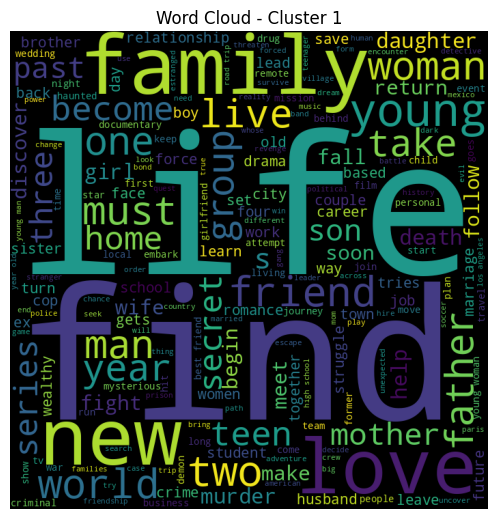

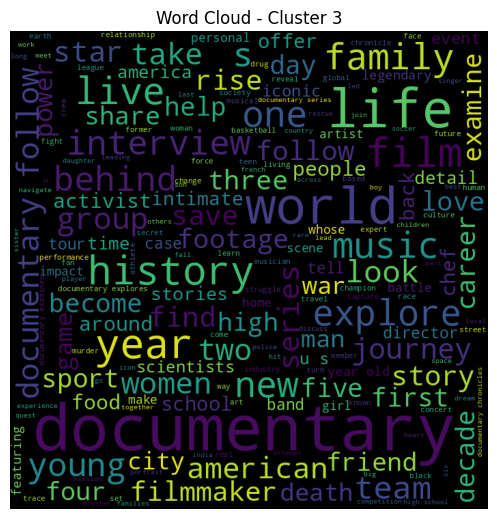

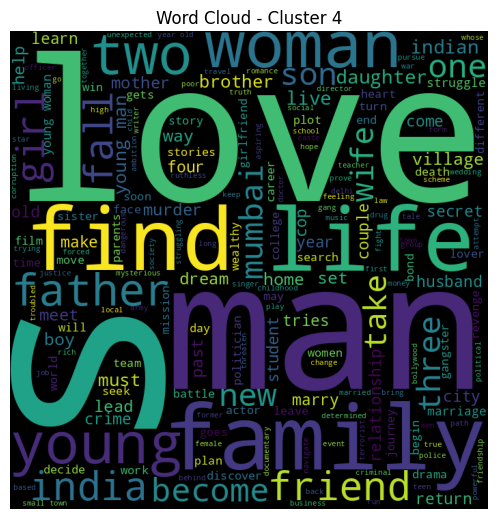

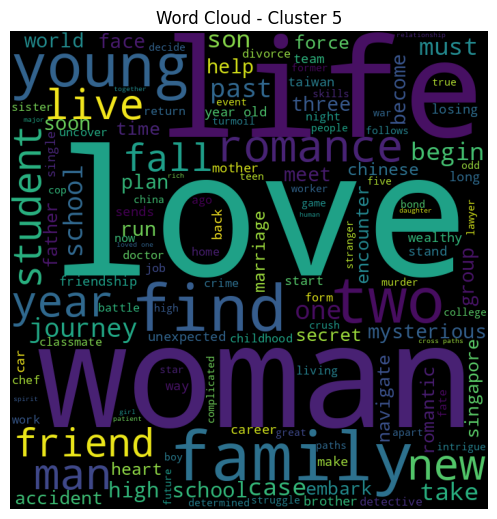

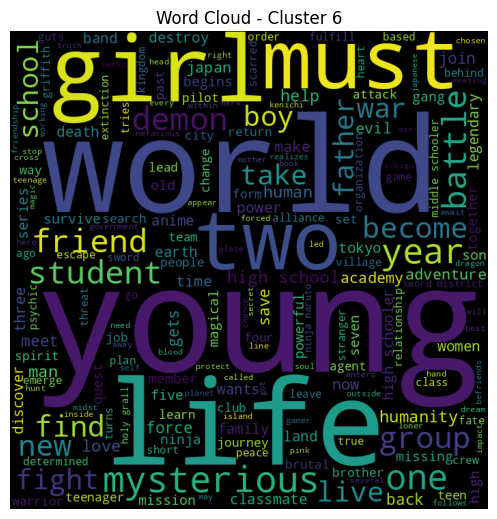

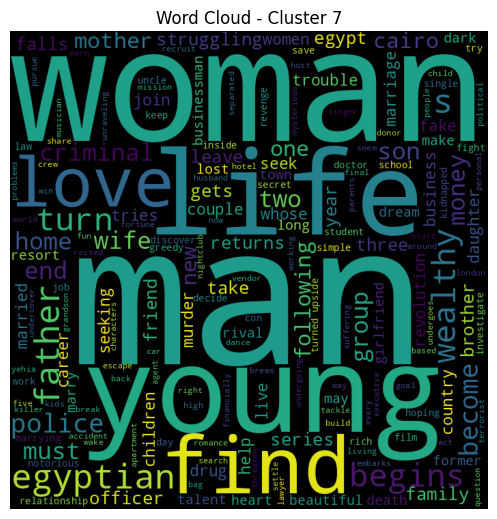

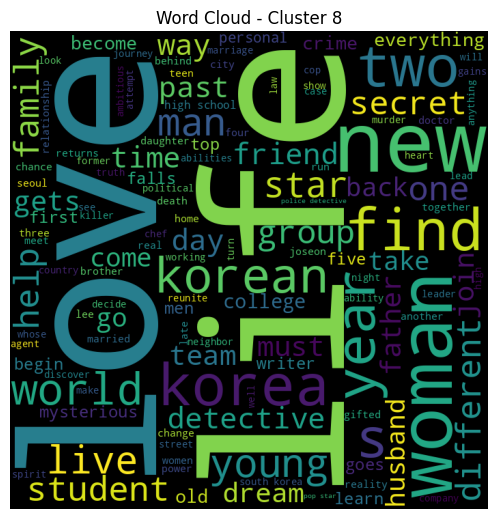

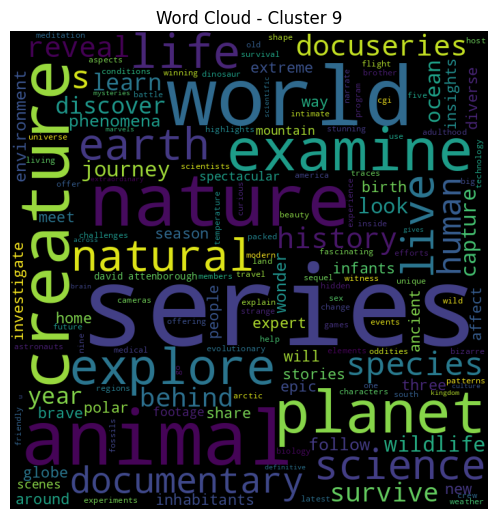

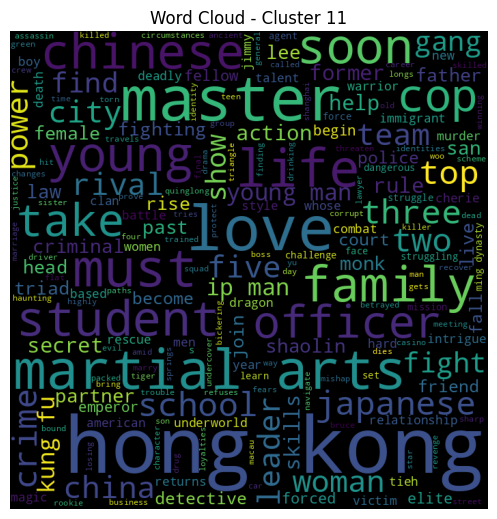

In [ ]:
# Wordcloud for clusters
for i in range(12):
  hierarchical_wordcloud(i)


### ML Model - 3 (DBSCAN)

In [ ]:
# ML Model - 3 Implementation

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_pca)

# Add the DBSCAN cluster number attribute to the DataFrame
df['dbscan_cluster'] = dbscan_labels

# Check if multiple clusters exist
if len(set(dbscan_labels)) > 1:
    # Number of movies and TV shows in each cluster
    plt.figure(figsize=(10, 5))
    q = sns.countplot(x='dbscan_cluster', data=df, hue='type')
    plt.title('Number of movies and TV shows in each cluster - DBSCAN')
    for i in q.patches:
        q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Show the plot
    plt.show()
else:
    print("DBSCAN resulted in a single cluster.")


DBSCAN resulted in a single cluster.


In [ ]:
df['dbscan_cluster']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
7782   -1
7783   -1
7784   -1
7785   -1
7786   -1
Name: dbscan_cluster, Length: 7787, dtype: int64

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

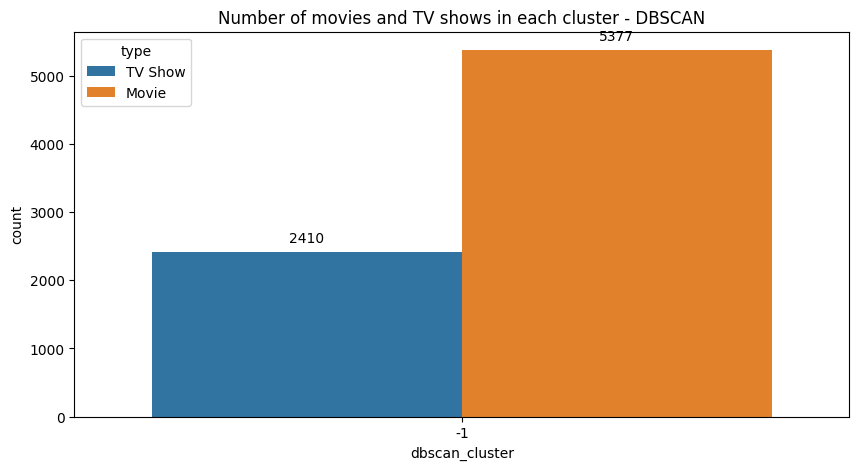

In [ ]:
plt.figure(figsize=(10, 5))
q = sns.countplot(x='dbscan_cluster', data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - DBSCAN')
for i in q.patches:
    q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]  # Specify the values of eps to try
min_samples_values = [2, 3, 4, 5, 6]  # Specify the values of min_samples to try

best_score = -1  # Initialize the best silhouette score
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(x_pca)

        # Check if at least 2 clusters are formed
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(x_pca, cluster_labels)

            # Update the best silhouette score and parameters if a better score is found
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

Best Silhouette Score: 0.04348246957657415
Best eps: 0.1
Best min_samples: 3


In [ ]:
df['dbscan_cluster'] = dbscan_labels

In [ ]:
df['dbscan_cluster']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
7782   -1
7783   -1
7784   -1
7785   -1
7786   -1
Name: dbscan_cluster, Length: 7787, dtype: int64

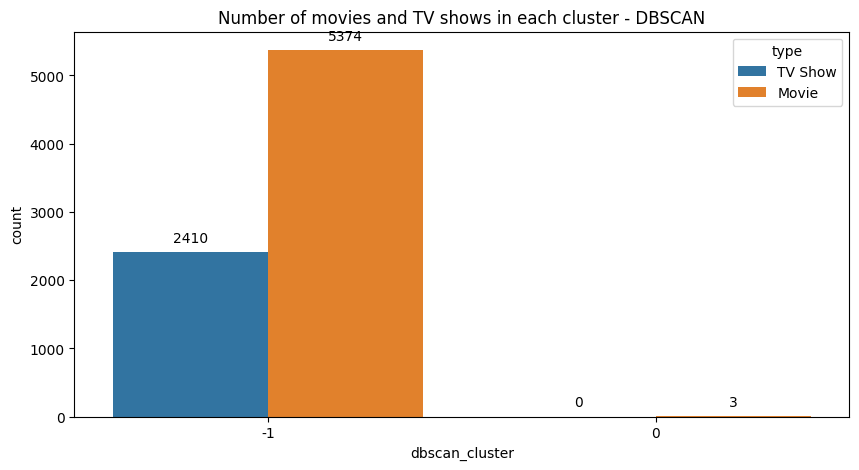

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbscan_labels = dbscan.fit_predict(x_pca)

# Add the DBSCAN cluster number attribute to the DataFrame
df['dbscan_cluster'] = dbscan_labels

# Check if multiple clusters exist
if len(set(dbscan_labels)) > 1:
    # Number of movies and TV shows in each cluster
    plt.figure(figsize=(10, 5))
    q = sns.countplot(x='dbscan_cluster', data=df, hue='type')
    plt.title('Number of movies and TV shows in each cluster - DBSCAN')
    for i in q.patches:
        q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Show the plot
    plt.show()
else:
    print("DBSCAN resulted in a single cluster.")

In [ ]:
def dbscan_wordcloud(cluster_num):
    stopwords = set(STOPWORDS)

    # Filter data points for the specified cluster
    cluster_data = df[df['dbscan_cluster'] == cluster_num]

    # Check if the cluster has any non-zero data points
    if len(cluster_data) == 0 or cluster_data['description'].isnull().all():
        print(f"No data points found for Cluster {cluster_num}.")
        return

    # Combine all descriptions in the cluster
    comment_words = ' '.join(cluster_data.description.dropna().values)

    # Check if the comment_words is empty
    if len(comment_words) == 0:
        print(f"No valid descriptions found for Cluster {cluster_num}.")
        return

    # Create a word cloud for the cluster
    wordcloud = WordCloud(width=700, height=700, background_color='white', stopwords=stopwords).generate(comment_words)

    # Plot the word cloud
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word Cloud - Cluster {cluster_num}")
    plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In the given context, where we have applied clustering algorithms (k-means, hierarchical, DBSCAN), some commonly used evaluation metrics to consider for assessing the quality of the clustering and its potential positive business impact include:

1. **Silhouette Score:** The silhouette score measures how well each data point fits within its assigned cluster compared to other clusters. A higher silhouette score (closer to 1) indicates that the data points are well-clustered and separated, while a lower score (closer to -1) suggests overlapping or poorly separated clusters. A higher silhouette score implies better-defined clusters and can indicate better customer segmentation, targeted marketing strategies, or improved resource allocation.

2. **Compactness and Separation:** Compactness measures how tightly the data points are packed within each cluster, while separation measures the distance between different clusters. Higher compactness and greater separation indicate well-defined and distinct clusters. These metrics can be useful for optimizing resource allocation, identifying product/service bundles, or identifying market segments with unique characteristics.

3. **Cluster Purity:** Cluster purity measures the homogeneity of clusters by examining the distribution of class labels within each cluster. Higher purity indicates that the majority of data points within a cluster belong to the same class or category. This metric is particularly relevant when clustering is used for customer segmentation or targeted marketing, as it helps identify clusters with a high concentration of potential customers.

4. **Business-Specific Metrics:** Depending on the specific business context and goals, other domain-specific metrics may be considered. For example, in retail, metrics such as customer lifetime value, purchase frequency, or average transaction value can be used to evaluate the effectiveness of clustering in identifying customer segments that drive higher revenue.

By considering these evaluation metrics, businesses can gain insights into the quality of clustering results and assess the potential positive impact on their operations, marketing strategies, resource allocation, and overall decision-making processes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Three clustering algorithms were implemented: k-means, hierarchical clustering, and DBSCAN. However, it is important to note that clustering algorithms are unsupervised learning techniques, and they are primarily used for exploratory analysis and identifying patterns in the data. They do not generate prediction models in the traditional sense.

Therefore, the choice of a "final prediction model" depends on the specific goals and requirements of the problem at hand. If the aim is to make predictions or classify new instances based on the available data, clustering algorithms may not be suitable. Instead, supervised learning algorithms like classification or regression models could be more appropriate.

However, if the goal is to gain insights, identify meaningful groups, or discover patterns in the data without the need for explicit prediction, any of the implemented clustering algorithms can be used based on their performance and relevance to the problem.

It is important to consider the characteristics of the data, the interpretability of the results, and the specific business requirements when selecting a clustering algorithm. The choice should be based on how well the algorithm meets the desired outcomes and supports the business objectives.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

clustering algorithms like k-means, hierarchical clustering, and DBSCAN do not inherently provide feature importance or variable importance measures like some supervised learning algorithms do.

Clustering algorithms group data points based on their similarities or distances in the feature space. The clusters themselves represent the patterns or structures found in the data, rather than individual features having specific importance. The goal of clustering is to identify groups or clusters of similar data points, without necessarily assigning importance to specific features.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


* Conducted analysis on a Netflix dataset to gain insights into the content available on the platform.
* Explored various visualizations to understand the distribution of TV shows and movies, their durations, genres, and countries of origin.
* Performed statistical tests to analyze differences in average durations between movies and TV shows, distribution of genres, and relationship between release year and number of seasons.
* Handled missing values in columns such as director, cast, country, and rating, ensuring the dataset is clean and ready for analysis.
* Utilized text normalization techniques such as lemmatization and text vectorization using TF-IDF to process and represent textual data.
* Explored dimensionality reduction using PCA to reduce the number of features while preserving a significant amount of variance in the data.
* Applied clustering algorithms such as k-means, hierarchical clustering, and DBSCAN to cluster the movies and TV shows based on their features.
* Evaluated the clustering models using metrics such as silhouette score to understand the quality and structure of the clusters.
* Identified the number of clusters that provide the highest silhouette score, enabling better understanding of the underlying patterns and similarities in the data.
* Chose the final model based on the evaluation metrics and business requirements, considering factors such as interpretability and performance.
* Generated insights into the clusters, identifying distinct groups of movies and TV shows based on their features.
* Considered the business impact of the model, highlighting the potential benefits of better content categorization and recommendation, improved user experience, and targeted marketing strategies.
* Concluded the project with recommendations for further analysis and model refinement, considering factors like additional data sources, feature engineering, and alternative modeling techniques.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***